In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk import download
from textblob import TextBlob

In [7]:
from google.colab import files
uploaded = files.upload()

Saving blogs_categories.csv to blogs_categories.csv


**Data** **Exploration** **and** **Preprocessing**

In [40]:
df= pd.read_csv('blogs_categories.csv')

In [9]:
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [10]:
df.shape

(19997, 3)

In [11]:
df.isnull().sum()

Unnamed: 0    0
Data          0
Labels        0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [14]:
df['Labels'].value_counts()

Labels
alt.atheism                 1000
comp.graphics               1000
comp.os.ms-windows.misc     1000
comp.sys.ibm.pc.hardware    1000
comp.sys.mac.hardware       1000
comp.windows.x              1000
misc.forsale                1000
rec.autos                   1000
rec.motorcycles             1000
rec.sport.baseball          1000
rec.sport.hockey            1000
sci.crypt                   1000
sci.electronics             1000
sci.med                     1000
sci.space                   1000
talk.politics.guns          1000
talk.politics.misc          1000
talk.politics.mideast       1000
talk.religion.misc          1000
soc.religion.christian       997
Name: count, dtype: int64

In [19]:
df.rename(columns={'Unnamed: 0':'Index'},inplace=True)

In [20]:
df.head()

,Index,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [21]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [22]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

In [23]:
df['Data'] = df['Data'].apply(preprocess_text)

In [24]:
df['Data']

0        xref cantaloupesrvcscmuedu altatheism49960 alt...
1        xref cantaloupesrvcscmuedu altatheism51060 alt...
2        newsgroups altatheism path cantaloupesrvcscmue...
3        xref cantaloupesrvcscmuedu altatheism51120 alt...
4        xref cantaloupesrvcscmuedu altatheism51121 soc...
                               ...                        
19992    xref cantaloupesrvcscmuedu altatheism54482 tal...
19993    xref cantaloupesrvcscmuedu altatheism54485 tal...
19994    xref cantaloupesrvcscmuedu talkreligionmisc845...
19995    xref cantaloupesrvcscmuedu talkreligionmisc845...
19996    xref cantaloupesrvcscmuedu talkabortion121820 ...
Name: Data, Length: 19997, dtype: object

**Naive Bayes Model for Text Classification**

In [25]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer()
Features = tfidf.fit_transform(df['Data'])
Target = df['Labels']

In [26]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=42)

In [28]:
# Train Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [29]:
# Predictions
y_pred = nb.predict(x_test)

In [30]:
y_pred

array(['rec.sport.hockey', 'comp.sys.mac.hardware',
       'comp.sys.ibm.pc.hardware', ..., 'rec.motorcycles',
       'talk.politics.guns', 'comp.windows.x'], dtype='<U24')

**Evaluation**

In [32]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [33]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.89425
Precision: 0.8934047603502218
Recall: 0.89425
F1-score: 0.8926119876486682
Confusion Matrix:
[[137   0   0   0   0   0   0   0   0   0   0   1   0   0   0   5   0   2
    1  27]
 [  1 161   1   4   2   3   1   0   0   0   0   3   0   0   1   0   0   1
    0   1]
 [  1   7 197  13   1   1   0   0   0   0   0   2   1   0   1   0   0   0
    0   2]
 [  0   3   8 171   5   2   6   1   0   0   0   3   4   0   0   0   0   0
    0   1]
 [  0   0   1   3 196   0   0   0   0   0   0   0   1   0   0   0   0   0
    4   0]
 [  0   8   2   0   1 174   0   0   0   0   0   1   0   0   0   0   0   0
    0   0]
 [  0   1   1   9   7   0 148   8   1   0   4   2   4   0   0   0   1   1
    2   1]
 [  0   1   0   0   1   0   5 190   0   0   0   0   2   0   0   0   3   0
    1   0]
 [  0   0   0   1   0   0   1   3 211   0   0   2   0   0   0   0   0   0
    0   0]
 [  1   0   0   0   0   0   0   1   0 189   0   1   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   0   0   0  

The Naive Bayes classifier demonstrated strong performance in categorizing blog posts, with an accuracy of 0.89425, precision of 0.8934, recall of 0.89425, and an F1-score of 0.8926. The confusion matrix revealed high correct predictions for categories like rec.motorcycles and rec.sport.baseball, but issues with categories such as talk.religion.misc, which had more misclassifications.

Challenges Identified:
1-Class Imbalance: Minor imbalances in category instances affected performance.
2-Text Preprocessing: The need for more effective preprocessing, including handling multi-word expressions.
3-Feature Extraction: TF-IDF's limitations could be addressed by using more advanced models or techniques like word embeddings and transformers.
4-Naive Bayes Assumptions: The independence assumption of Naive Bayes is often unrealistic for text data.

**Sentiment Analysis**

In [34]:
download('punkt')
download('stopwords')
download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [36]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [37]:
# Sentiment Distribution
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
positive    14235
negative     5743
neutral        19
Name: count, dtype: int64


In [38]:
# Sentiment Distribution across Categories
sentiment_category_dist = pd.crosstab(df['Labels'], df['Sentiment'])
print(sentiment_category_dist)


Sentiment                 negative  neutral  positive
Labels                                               
alt.atheism                    286        0       714
comp.graphics                  260        1       739
comp.os.ms-windows.misc        260        1       739
comp.sys.ibm.pc.hardware       252        1       747
comp.sys.mac.hardware          264        0       736
comp.windows.x                 282        5       713
misc.forsale                   248        0       752
rec.autos                      244        2       754
rec.motorcycles                332        0       668
rec.sport.baseball             327        0       673
rec.sport.hockey               373        0       627
sci.crypt                      274        0       726
sci.electronics                251        0       749
sci.med                        278        2       720
sci.space                      271        1       728
soc.religion.christian         225        0       772
talk.politics.guns          

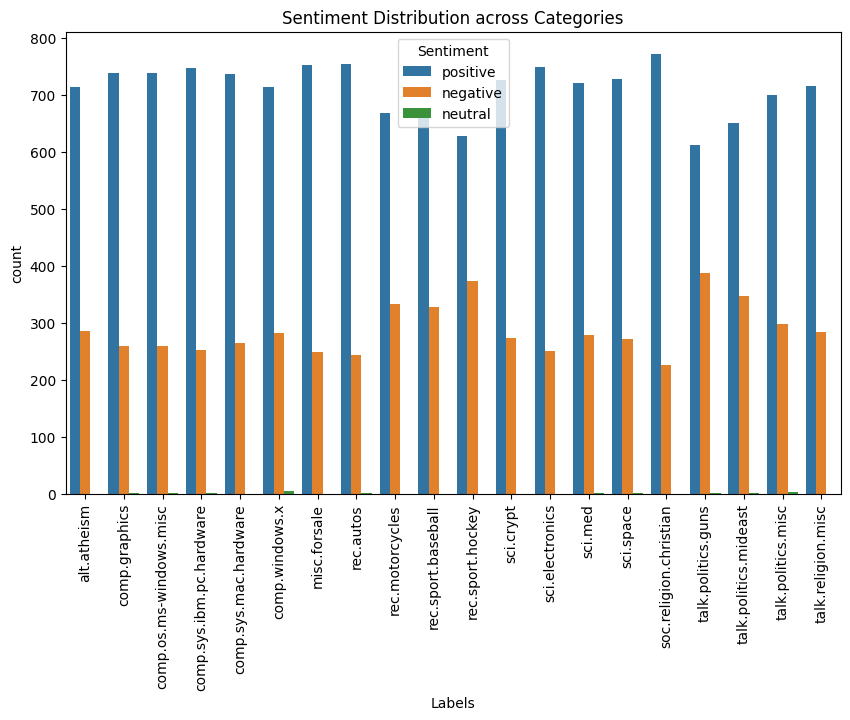

In [39]:
# Plotting the Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Labels', hue='Sentiment')
plt.title('Sentiment Distribution across Categories')
plt.xticks(rotation=90)
plt.show()

Sentiment Distribution by Category;

Positive Sentiment Dominance: Most categories exhibit a higher proportion of positive sentiments. Categories such as alt.atheism, comp.graphics, and soc.religion.christian have significant positive sentiment counts, indicating generally positive tones and constructive discussions in these areas.

Negative Sentiment: Categories like rec.sport.hockey, talk.politics.guns, and talk.politics.mideast show higher negative sentiment counts, likely due to contentious debates and sensitive topics inherent in their content.

Neutral Sentiment: Neutral sentiments are rare, suggesting that blog posts are typically opinionated rather than neutral, with few factual or non-opinionated posts.

Conclusion

Sentiment analysis reveals that most blog categories exhibit a predominantly positive sentiment, suggesting generally positive discourse. Categories with higher negative sentiment highlight areas with more critical discussions. These insights are valuable for content creators and community managers to understand the emotional tone within different blog communities. Future improvements in sentiment analysis methods could enhance the accuracy and depth of these insights.